# Cyberbullying On Social Media

# Discussion of the Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.pyplot as plt

import tabletext

In [2]:
f1_tfidf_lr = 0.69
auc_tfidf_lr = 0.71
f1_w2v_lr = 0.66
auc_w2v_lr = 0.65
f1_gft_lr = 0.66
auc_gft_lr = 0.65

In [3]:
f1_tfidf_nb = 0.69
auc_tfidf_nb = 0.71
f1_w2v_nb = 0.65
auc_w2v_nb = 0.67
f1_gft_nb = 0.65
auc_gft_nb = 0.67

In [4]:
f1_tfidf_xgb = 0.72
auc_tfidf_xgb = 0.72
f1_w2v_xgb = 0.70
auc_w2v_xgb = 0.68
f1_gft_xgb = 0.69
auc_gft_xgb = 0.65

In [5]:
f1_tfidf_cnn = 0.69
auc_tfidf_cnn = 0.69
f1_w2v_cnn = 0.68
auc_w2v_cnn = 0.68
f1_gft_cnn = 0.46
auc_gft_cnn = 0.57
f1_k_cnn = 0.43
auc_k_cnn = 0.57
f1_cnn = 0.58
auc_cnn = 0.60

In [6]:
f1s = {'Classifier': ['Logistic Regression w. TFIDF', 'Logistic Regression w. Word2Vec', 'Logistic Regression w. Glove/FastText',
                      'Naive Bayes w. TFIDF', 'Naive Bayes w. Word2Vec', 'Naive Bayes w. Glove/FastText',
                      'XGBoost w. TFIDF (imbalanced)', 'XGBoost w. Word2Vec (balanced)', 'XGBoost w. Glove/FastText',
                      'CNN w. TFIDF', 'CNN w. Word2Vec', 'CNN w. Glove/FastText', 'CNN w. Keras Embeddings', 'CNN no Embeddings',
                     ],
        'F1': [f1_tfidf_lr, f1_w2v_lr, f1_gft_lr,
               f1_tfidf_nb, f1_w2v_nb, f1_gft_nb,
               f1_tfidf_xgb, f1_w2v_xgb, f1_gft_xgb,
               f1_tfidf_cnn, f1_w2v_cnn, f1_gft_cnn, f1_k_cnn, f1_cnn,
               ]
        }

In [7]:
aucs = {'Classifier': ['Logistic Regression w. TFIDF', 'Logistic Regression w. Word2Vec', 'Logistic Regression w. Glove/FastText',
                      'Naive Bayes w. TFIDF', 'Naive Bayes w. Word2Vec', 'Naive Bayes w. Glove/FastText',
                      'XGBoost w. TFIDF', 'XGBoost w. Word2Vec', 'XGBoost w. Glove/FastText',
                      'CNN w. TFIDF', 'CNN w. Word2Vec', 'CNN w. Glove/FastText', 'CNN w. Keras Embeddings', 'CNN no Embeddings',
                     ],
        'AUC': [auc_tfidf_lr, auc_w2v_lr, auc_gft_lr,
                auc_tfidf_nb, auc_w2v_nb, auc_gft_nb,
                auc_tfidf_xgb, auc_w2v_xgb, auc_gft_xgb,
                auc_tfidf_cnn, auc_w2v_cnn, auc_gft_cnn, auc_k_cnn, auc_cnn
                ]
        }

In [8]:
df_f1 = pd.DataFrame(f1s, columns = ['Classifier', 'F1'])

In [9]:
df_auc = pd.DataFrame(aucs, columns = ['Classifier', 'AUC'])

***

**Results**

***

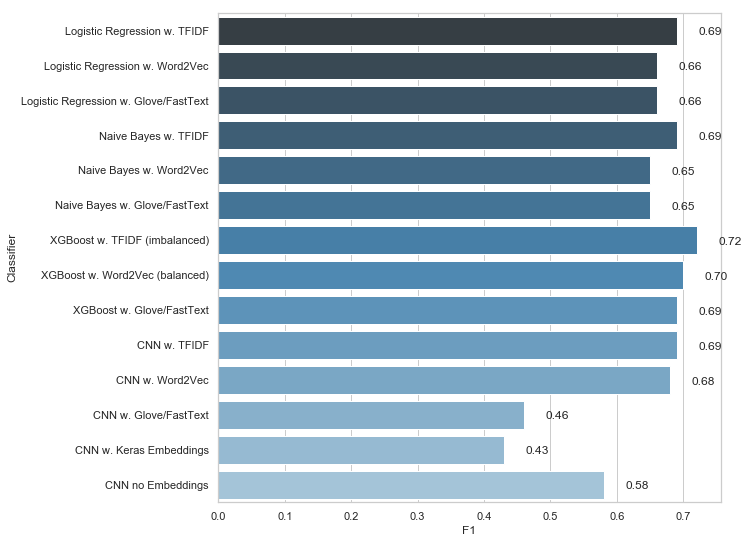

In [10]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.barplot(x = "F1", y = "Classifier", data = df_f1, label = "Classifier", palette = "Blues_d", orient='h')
# Annotate every bar           
for p in ax.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y() + 0.55 * p.get_height(), '{:1.2f}'.format(width), ha = 'center', va = 'center')

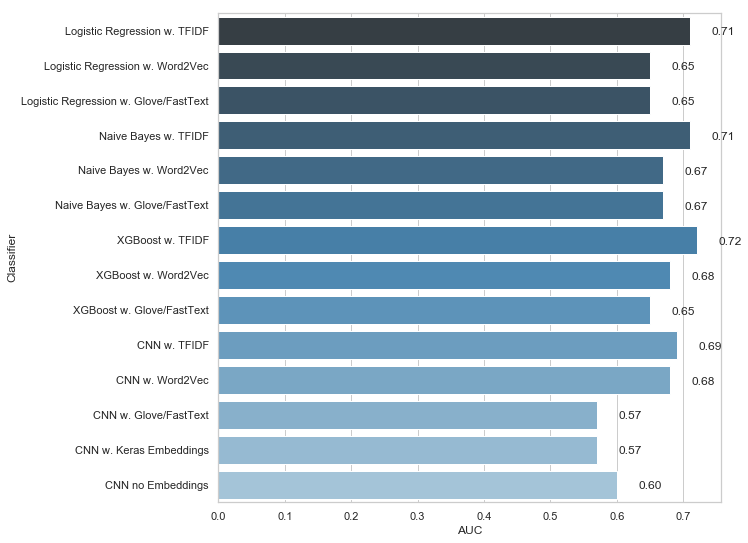

In [11]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.barplot(x = "AUC", y = "Classifier", data = df_auc, label = "Classifier", palette = "Blues_d", orient='h')
# Annotate every bar          
for p in ax.patches:
    width = p.get_width()
    plt.text(0.05 + p.get_width(), p.get_y() + 0.55 * p.get_height(), '{:1.2f}'.format(width), ha = 'center', va = 'center')

***

**Discussion**

***

It is very difficult to say which model performs better based on these results, as they are very similar. If we set the threshold for F1 at 0.7 (a kind of decent performance), XGBoost with TF-IDF on imbalanced data, XGBoost with word embeddings and traditional classifiers like Logistic Regression or Naive Bayes with TF-IDF performed best. Perhaps the conclusion (to be taken with a grain of salt) is that XGBoost as classifier slightly outperforms all other classifiers.


***

**Reflections**

***

1. The taks and the data set I chose to work with were complicated due to several reasons:


- only about 11'000 samples in train with 2 classes (negative, positive) with imbalance (70:30).
- some labels seemed to be incorrect, which sometimes happens with manual labeling of texts. 
- some comments were short, some very long. In some cases the comments contained not only the comments themselves, but also the answers of other people to those comments. This resulted in some cases in very long comments and a vast majority of very short comments, whcih skewed the distribution.
- one more interesting problem: a comment could be positive in general, but have words with negative sentiments or connotations (which seemed to confuse some of the models).

One the one hand, if the situation is complex and requires deep understanding of the context, deep learning models should work quite well; on the other hand, we have only several thousands samples, which seemed to be not enough for deep learning.

2. Once question I had when I started this project was: – do word embeddings and more specifically pretrained embeddings give an extra edge to an NLP model? 

Let’s inspect which word embedding performs the worst. Surprisingly, the pretrained GloVe, FastText word embeddings and Keras embeddings performed relatively worse on text classification. Perhaps, it’s because TF-IDF or in some cases even the custom trained word2vec are specifically fitted for this dataset, and thus provide most relevant information. I think it depends on the size and nature of the data set, and in general it would help, however my data set was relatively small and comprised of mostly short comments. It doesn’t necessarily mean that one should not use GloVe word embedding or similar, we might probably run into new words that haven’t had word embedding in our word model. In this case, GloVe word embedding would be a great help due to its wide coverage of the vocabulary. This just hasn't been the case for this particular scenario.

3. In general CNNs combined with embeddings passed on through the embedding layer of keras (either pretrained or keras) performed worst in terms of the chosen comparison metrics. My assumption there is that the data set is not large enough for neural networks. CNNs work best with large training sets where they are able to find generalizations that a simple model like logistic regression is not able to find.

4. I didn't come even close to replicating the results in the original paper. There might be several reasons for this: the authors of the paper chose to keep 20% of the dataset for testing, whereas I chose only 10%. The performance on the test set might not be that reliable if the test set is small. In other words, the performance might be different if we change to another test set. I also haven't been able to deduce from the paper what kind of averaging method (micro, macro, weighted) was used when calculating precision and recall. Obviously for the weighted average the results I obtained were slightly better, coming closer to the results in the original paper. This is in the end, a business domain problem decision, and it depends if detecting the bullying comments is more important than marking some non-bullying comments as bullying is an acceptable cost. Another factor that might have influenced the different in results is the definition of the threshold (see below).

***

**Lessons learned along the way**

***

**1. Lesson**

**A recipe for a better solution**

I have tried a lot of things to improve the score: different models, hyperparameter optimization, text cleaning, undersampling, and other things. This is the process I followed:

**A lot of preprocessing**

I applied a very thorough data processing: removing user ids, removing html formatting, removing punctuations and special characters, removing digits, removing stopwords, removing user ids, expanding contractions and slang, transforming emojis, spelling corrections, applying lemmatization. I also looked for the most rare words and removed them as well. Cleaning text did wonders for me, but I was also able to improve my method by shortening the text for example for CNNs. Initially I had a MAX_SEQUENCE_LENGTH equal to the longest text in the training data set. Since the distribution was very skewed, this meant about 80% of the texts were padded with zeros. I found that cutting some of the lengthier texts at the risk of losing some information provided better results. Reducing the dimension of the Word2Vec vectors from 300 to 100 also helped improve most of the classifiers.

**Hyperparameter optimization**

Hyperparameter optimization is always important. Sklearn API allows to build pipelines and optimize them. In the end since I wanted to introduce smote in the pipeline I ended up using the imbalanced learn pipelines, but the principle is the same. For the most cases I used GridSearchCV to find the best hyperparameter combination. For XGBoost I tried to do the same, but running a grid search even on a minimized search space took more than 30 hours. I still gave it a try to compare it to my manual process of finding the best parameters. Even though GridSearch found completely different hyperparameters, the results were very similar. This made me conclude that in this case the choice of hyperparameters is secondary, and the results are mostly influenced by the quality of the data set.

**Oversampling**

There are many ways to deal with class imbalance: undersampling, oversampling, SMOTE, applying class weights. I applied SMOTE consistently across all classifiers and I used CNNs with class weights and also tried logistic regression with balanced class weights, but it wasn’t enough. In most cases it helped (although the improvements were minimal), but not always. XGBoost with TF-IDF produced slightly better results with the imbalanced data set. I presume this is more of an exception to the rule.

**2. Lesson**

**The Wrong Way to Oversample**

With my training data created, I wanted to upsample the features extracted for the bullying comments using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE creates synthetic observations of the minority class (bullying comments) by:

- Finding the k-nearest-neighbors for minority class observations (finding similar observations)
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

After upsampling, I had a balanced dataset wtih which I was able to split the data into separate training and test sets and build the differen models to classify the comments. Since I was using GridSearchCV for most of the models, I initially did not create a validation set, since the built-in cross validation would handle that. So I fed the pipeline with the already upsampled training set.
I didn't notice the error until I reached the neural networks part. For this part I had to specifically use a train-validation-test split (train-validation split from the upsampled dataset) and noticed pretty big inconsistencies between the results on the validation versus test data set. For the validation set I obtained a recall close to 90%. That means the model correctly identified almost 90% of the total bullying comments. So I though that was really great. However, when I calculated the precision and recall for the model on the test dataset I only got a recall close to 30% on the test data, which was a huge difference.

**What Happened?**

By oversampling before splitting into training and validation datasets, I let information from the validation set accidentally get into the training of the model.

The way I imagine it is by using the simplistic case of simple oversampling (where I just duplicate observations). If I upsample a dataset before splitting it into a train and validation set, I could end up with the same observation in both datasets. As a result, a complex enough model will be able to perfectly predict the value for those observations when predicting on the validation set, inflating the recall.

SMOTE does not create duplicate observations. However, because the SMOTE algorithm uses the nearest neighbors of observations to create synthetic data, it still bleeds information. If the nearest neighbors of minority class observations in the training set end up in the validation set, their information is partially captured by the synthetic data in the training set. As a result, the model will be better able to predict validation set values than completely new data (test data).

**3. Lesson**

**What's the best metric?**

The importance of the F1 score is different based on the scenario. 
- Balanced class: In this situation, the F1 score can effectively be ignored, the mis-classification rate is key.
- Unbalanced class, but both classes are important: If the class distribution is highly skewed (such as 80:20 or 90:10), then a classifier can get a low mis-classification rate simply by choosing the majority class. In such a situation, the best classifier is the one that gets high F1 scores on both classes, as well as low mis-classification rate. A classifier that gets low F1-scores should be overlooked.
- Unbalanced class, but one class if more important that the other. For e.g. in Fraud detection, it is more important to correctly label an instance as fraudulent, as opposed to labeling the non-fraudulent one. In this case, the best classifier is the one that has a good F1 score only on the important class.


Using F1 score as a metric, we are sure that if the F1 score is high, both precision and recall of the classifier indicate good results.
That characteristic of the metric allows us to compare the performance of two classifiers using just one metric and still be sure that the classifiers are not making some horrible mistakes that are unnoticed by the code which scores their output.
If we have a classifier whose F1 score is low, we can’t tell whether it has problems with false positives or false negatives. In this case, the best way to “debug” such a classifier is to use confusion matrix to diagnose the problem and then look at the problematic cases in the validation or test dataset.

ROC-AUC score is independent of the threshold set for classification because it only considers the rank of each prediction and not its absolute value. The same is not true for F1 score which needs a threshold value in case of probabilities output. I have not changed the default value of 0.5. But perhaps a different threshold might have been more appropriate for this type of problem.

Classification with imbalanced class distributions is a major problem in machine learning. Researchers have given considerable attention to the applications in many real-world scenarios. Although several works have utilized the area under the receiver operating characteristic (ROC) curve to select potentially optimal classifiers in imbalanced classifications, limited studies have been devoted to finding the classification threshold for testing or unknown datasets. In general, the classification threshold is simply set to 0.5, which is usually unsuitable for an imbalanced classification.

There are many techniques that may be used to address an imbalanced classification problem, such as resampling the training dataset and developing customized version of machine learning algorithms. I've tried almost all of them.

Nevertheless, perhaps the simplest approach to handle a severe class imbalance is to change the decision threshold. Although simple and very effective, this technique is often overlooked as was noted by Foster Provost in his 2000 article titled [“Machine Learning from Imbalanced Data Sets.”](https://www.aaai.org/Library/Workshops/2000/ws00-05-001.php)

The bottom line is that when studying problems with imbalanced data, using the classifiers produced by standard machine learning algorithms without adjusting the output threshold may not be the most appropriate way to handle the problem.

I've come across the paper mentioned before when I was very close to the completion of this project. I believe a further investigation line would be to find the most appropriate threshold for this particular problem.

**4. Lesson**

**Convolutional Neural Networks for sentence classification in Keras**

[Kim's paper](http://www.aclweb.org/anthology/D14-1181) was published in 2014 and showed that not only are CNNs great for images but also text. With an extreamly simple architecture Kim outperformed all other models in 4 out of 7 benchmarks at the time. 

**Architecture diagram taken from Kim's paper**

![Architecture diagram](https://imgur.com/Dsu7Q61.png)

The architecture Kim used goes like this:

The sentences are represented as vectors of words and those words are converted into (300D) vectors giving us a 2D representation for each sentence. Kim uses a few different approaches for creating these word vectors:

- **CNN-rand**: where embeddings are randomly assigned to each word
- **CNN-static**: word2vec is used to provide word embeddings. Unknown words are randomly initialised. These embeddings are kept fixed.
- **CNN-non-static**: as above, but the vectors are fine-tuned (i.e. they can be changed) during training
- **CNN-multichannel**: Here Kim uses two sets of word vectors. My understanding is he applies both to the sentence (resulting in two, sentence_length x 300D matrices) and performs convolutions on both. During training he fine tunes one embedding but keeps the other one fixed. He states the hope of this was that it would act as a form of regularization but the results were mixed. 

He then performs convolutions on these 2D representations, but he does it in a way you don't see very often. Convolutions of different window sizes (3, 4 and 5) are performed on the representations directly and then max pooled. This is a little like an inception module in the Google Net.

Finally after a layout of dropout, an output layer is directly used to do the predictions.

I have tried to replicate as much as possible his ideas, including the multichannel setup, but instead of using the same embedding (one fixed, one trainable), I used two different embeddings (Glove and FastText and allowed them both to be fine tuned during training, since in my case this considerably improved the results). Kim uses a 300D w2v model trained using cbow. I used a 200D model trained using GloVe, and a 300D model trained using FastText. I also swapped out the optimizer Kim used (AdaDelta) for Adam - AdaDelta took forever to run and Adam seemed to be a good stable choice. I did not present the results for the static setup, as that model didn't do that much better (maybe a bit worse depending how the run went) than the random initialization. This agrees with what Kim found.

However, I did not not get the best results with this architecture. My assumptions is that my data set is too small for such complex models to work well. 


I learnt a lot doing this and it was well worth investing almost more time in the CNN part than in the entire rest of the project togther.

It took me a long time to get anything other than random success with the Glove/FastText embeddings. My mistake was to try to create the embedding matrices by initializing them with a zero vector for every words not found in the vocabulary. The result was half of my text was labelled with the same vector (0's in 200D or 300D) and nothing was learnt.

As I said above I was really surprised how poorly the embeddings via the Keras Embedding Layer worked. I am still not sure exactly why this would be but it might be interesting to investigate.

Finally the most important lesson learnt here was to make the embeddings trainable as it made a huge improvement to this model.